

Using the graph from figure 10.1 from the textbook (http://infolab.stanford.edu/~ullman/mmds/book.pdf) to demonstrate

<img src="images/smallsocialgraph.png">

In [3]:
#Example Small social newtork as a connection matrix
sc1 = ([(0, 1, 1, 0, 0, 0, 0), 
        (1, 0, 1, 1, 0, 0, 0),
        (1, 1, 0, 0, 0, 0, 0),
        (0, 1, 0, 0, 1, 1, 1),
        (0, 0, 0, 1, 0, 1, 0),
        (0, 0, 0, 1, 1, 0, 1),
        (0, 0, 0, 1, 0, 1, 0)])

http://networkx.github.io/documentation/latest/install.html

pip install networkx


to install networkx into your python modules

pip install networkx  --upgrade 

to upgrade you previously installed version

You may have to restart your ipython engine to pick up the new module
Test your installation by running the new box locally

A full tutorial is available at:
http://networkx.github.io/documentation/latest/tutorial/index.html

There are other packages for graph manipulation for python:
python-igraph, (http://igraph.org/python/#pydoc1)
Graph-tool, (https://graph-tool.skewed.de)

I picked networkx because it took little effort to install.



In [4]:
import networkx as nx
G1 = nx.Graph()


In [5]:
G1.add_nodes_from(['A','B','C','D','E','F','G'])
G1.nodes()


['A', 'C', 'B', 'E', 'D', 'G', 'F']

In [6]:
G1.add_edges_from([('A','B'),('A','C')])
G1.add_edges_from([('B','C'),('B','D')])
G1.add_edges_from([('D','E'),('D','F'),('D','G')])
G1.add_edges_from([('E','F')])
G1.add_edges_from([('F','G')])

In [7]:
import matplotlib.pyplot as plt
#drawing the graph
%matplotlib inline  


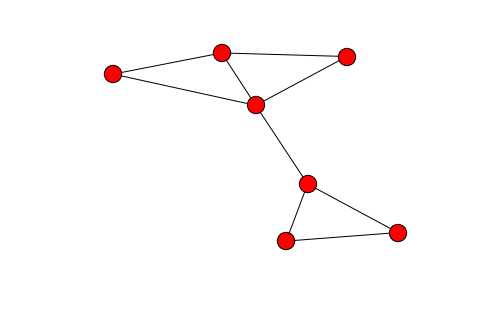

In [8]:
nx.draw(G1)

{'A': <matplotlib.text.Text at 0x1125ab050>,
 'B': <matplotlib.text.Text at 0x1125ab790>,
 'C': <matplotlib.text.Text at 0x1125ab110>,
 'D': <matplotlib.text.Text at 0x1125b7050>,
 'E': <matplotlib.text.Text at 0x1125abbd0>,
 'F': <matplotlib.text.Text at 0x1125b78d0>,
 'G': <matplotlib.text.Text at 0x1125b7490>}

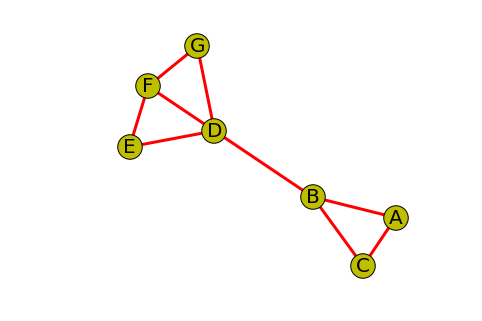

In [9]:
pos=nx.spring_layout(G1)
nx.draw(G1,pos,node_color='y', edge_color='r', node_size=600, width=3.0)
nx.draw_networkx_labels(G1,pos,color='W',font_size=20,font_family='sans-serif')
#https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
#Some parameters to play with

Let's play with some algorithms in class:
https://networkx.github.io/documentation/latest/reference/algorithms.html

Social Graph analysis algorithms

Betweenness:
https://networkx.github.io/documentation/latest/reference/algorithms.centrality.html#betweenness

EigenVector centrality
https://networkx.github.io/documentation/latest/reference/algorithms.centrality.html#eigenvector


Clustering per node
https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.cluster.clustering.html

All Shortest Paths
https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.shortest_paths.generic.all_shortest_paths.html

Laplacian matrix
https://networkx.github.io/documentation/latest/reference/generated/networkx.linalg.laplacianmatrix.laplacian_matrix.html#networkx.linalg.laplacianmatrix.laplacian_matrix



Each of the students pair up and work on demonstrating a networkx algorithm
Create a new ipython page and submit it

In [10]:
nx.edge_betweenness_centrality(G1)

{('A', 'B'): 0.23809523809523808,
 ('A', 'C'): 0.047619047619047616,
 ('B', 'D'): 0.5714285714285714,
 ('C', 'B'): 0.23809523809523808,
 ('D', 'F'): 0.19047619047619047,
 ('D', 'G'): 0.21428571428571427,
 ('E', 'D'): 0.21428571428571427,
 ('E', 'F'): 0.07142857142857142,
 ('G', 'F'): 0.07142857142857142}

In [11]:
nx.betweenness_centrality(G1)

{'A': 0.0,
 'B': 0.5333333333333333,
 'C': 0.0,
 'D': 0.6333333333333333,
 'E': 0.0,
 'F': 0.03333333333333333,
 'G': 0.0}

In [12]:
def most_important(G):
 """ returns a copy of G with
     the most important nodes
     according to the pagerank """ 
 ranking = nx.betweenness_centrality(G).items()
 print ranking
 r = [x[1] for x in ranking]
 m = sum(r)/len(r) # mean centrality
 t = m*3 # threshold, we keep only the nodes with 3 times the mean
 Gt = G.copy()
 for k, v in ranking:
  if v < t:
   Gt.remove_node(k)
 return Gt

Gt = most_important(G1) # trimming

[('A', 0.0), ('C', 0.0), ('B', 0.5333333333333333), ('E', 0.0), ('D', 0.6333333333333333), ('G', 0.0), ('F', 0.03333333333333333)]


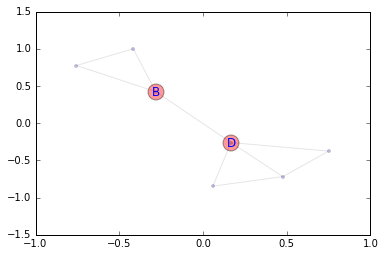

In [13]:
from pylab import show
# create the layout
pos = nx.spring_layout(G1)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G1,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(G1,pos,alpha=0.1)

# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

In [14]:
G2 = nx.gnm_random_graph(15,25)

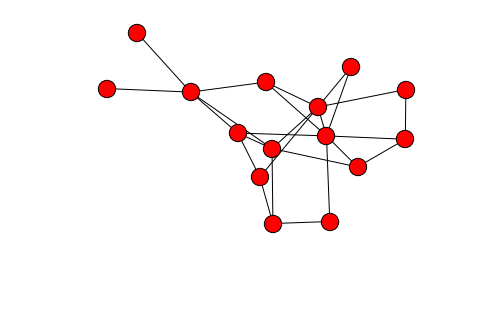

In [15]:
nx.draw(G2)

In [16]:
Gt = most_important(G2)

[(0, 0.20494505494505494), (1, 0.2884615384615385), (2, 0.03882783882783883), (3, 0.0293040293040293), (4, 0.0879120879120879), (5, 0.031135531135531136), (6, 0.0), (7, 0.009157509157509158), (8, 0.0), (9, 0.022893772893772892), (10, 0.26355311355311356), (11, 0.0), (12, 0.10054945054945054), (13, 0.024725274725274728), (14, 0.1952380952380953)]


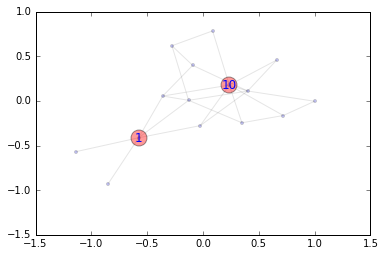

In [17]:
pos = nx.spring_layout(G2)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G2,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(G2,pos,alpha=0.1)

# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

KeyError: 15

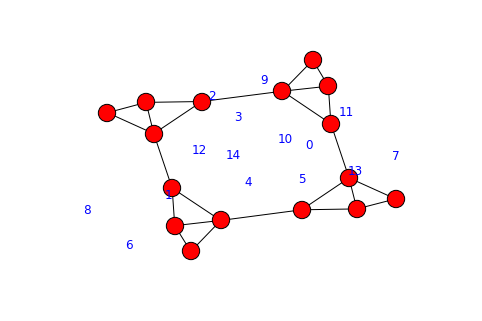

In [18]:
G3 = nx.connected_caveman_graph(4,4)
nx.draw(G3)
nx.draw_networkx_labels(G3,pos,font_size=12,font_color='b')

[(0, 0.23333333333333336), (1, 0.0), (2, 0.02936507936507937), (3, 0.2658730158730159), (4, 0.23333333333333336), (5, 0.0), (6, 0.02936507936507937), (7, 0.2658730158730159), (8, 0.2333333333333334), (9, 0.0), (10, 0.029365079365079365), (11, 0.26587301587301587), (12, 0.23333333333333336), (13, 0.0), (14, 0.029365079365079365), (15, 0.26587301587301587)]


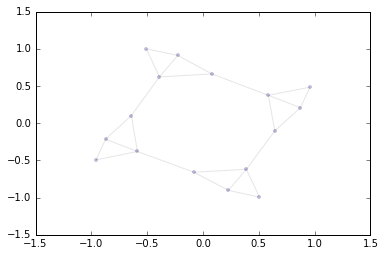

In [19]:
Gt = most_important(G3)
pos = nx.spring_layout(G3)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G3,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(G3,pos,alpha=0.1)

# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()